# 1. Realce laplaciano

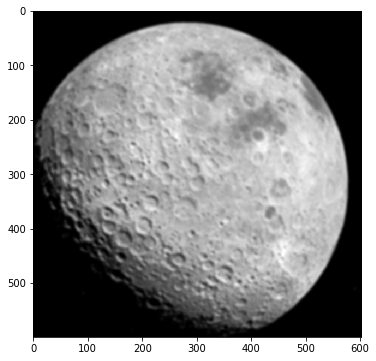

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import scipy.ndimage as ndi

img = plt.imread('moon.tiff')
img_float = img.astype(float)
plt.figure(figsize=[6,6])
plt.imshow(img_float, 'gray')

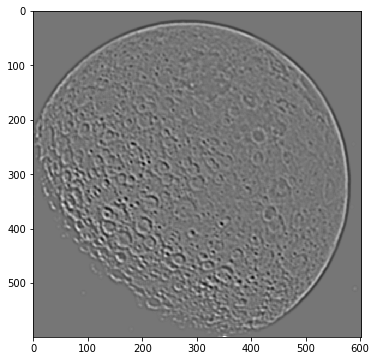

In [2]:
# Filtro laplaciano
filtro_lap = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])

# Suaviza um pouco a imagem para eliminar ruídos na segunda derivada
img_smooth = ndi.gaussian_filter(img_float, sigma=1)
# Aplicação do laplaciano
img_lap = convolve(img_smooth, filtro_lap, 'same')
plt.figure(figsize=[6,6])
plt.imshow(img_lap, 'gray')

Definimos uma imagem com mais nitidez através da soma da imagem original e a imagem resultante da aplicação do laplaciano:

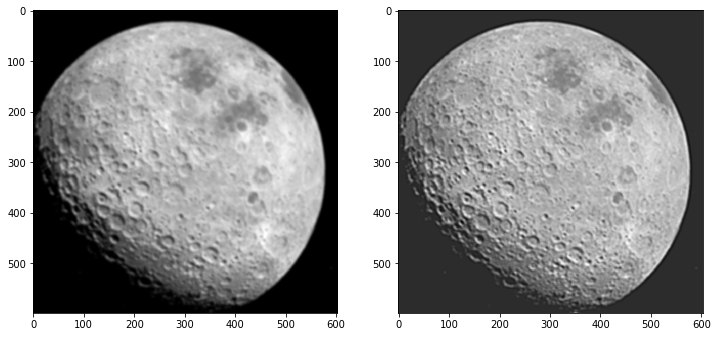

In [3]:
c = 5
img_improv = img_float+c*img_lap
plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img_improv, 'gray')

# 2. Realce highboost

Aplicamos uma suavização utilizando um valor alto de sigma para a gaussiana, e depois calculamos a diferença entre a imagem original e a suavizada

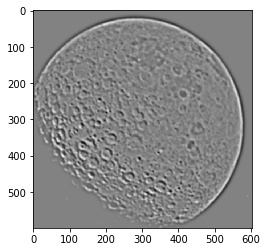

In [4]:
img_smooth = ndi.gaussian_filter(img_float, sigma=5)
img_bord = img_float - img_smooth
plt.imshow(img_bord, 'gray')

A imagem com maior nitidez é definida pela soma da imagem original com a imagem diferença calculada acima

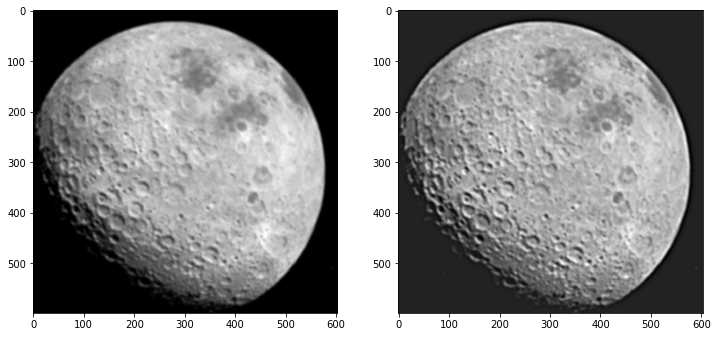

In [5]:
c = 1
img_boosted = img_float + c*img_bord

plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img_boosted, 'gray')